### Linear Regression

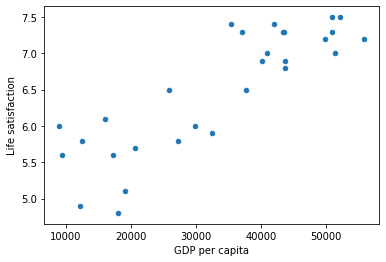

Initial cost= 58941748.000000000 W= 0.29870465 b= 2.1841779
Epoch  0: W=1.76 b=-0.43, loss=118901366784.00000
Epoch  1: W=-13504433152.00 b=-341037.44, loss=6992921391311237529832976809984.00000


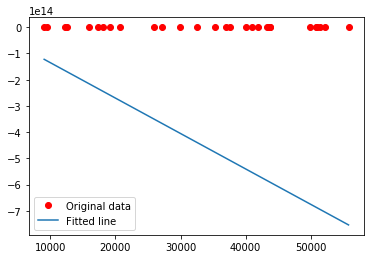

In [55]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# The data and the data prepartion steps are taken from : 
# https://github.com/zmostafa/handson-ml/blob/master/01_the_machine_learning_landscape.ipynb

datapath = os.path.join("../datasets", "lifesat", "")

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]


# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
train_X = np.c_[country_stats["GDP per capita"]]
train_Y = np.c_[country_stats["Life satisfaction"]]
n_samples = len(train_X)
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Training Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

class LinearRegressionModel(object):
    def __init__(self):
        # Define Varibales for Weights and Bias
        self.W = tf.Variable(np.random.randn())
        self.b = tf.Variable(np.random.randn())
    def __call__ (self,x):
        # Deifne Linear Model 
        return self.W * x + self.b

model = LinearRegressionModel()

# Define Cost Function : Mean squared error
def loss(pred , label):
    return tf.reduce_sum(tf.pow(pred-label, 2))

# Optimizer : Gradient descent
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)#.minimize(cost)

def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)
# Compute gradients
# grad = tfe.implicit_gradients(cost)
# Initial cost, before optimizing
print("Initial cost= {:.9f}".format(
    cost),
    "W=", W.numpy(), "b=", b.numpy())

# Training
# for step in range(training_epochs):

#     # optimizer.apply_gradiants(grad(pred,train_Y))
#     with tf.GradientTape() as tape:
#         grads = tape.gradient(cost, [W,b])
#         optimizer.apply_gradients(zip(grads, [W,b]))

#     if (step + 1) % display_step == 0 or step == 0:
#         print("Epoch:", '%04d' % (step + 1), "cost=",
#               "{:.9f}".format(cost),
#               "W=", W.numpy(), "b=", b.numpy())
#     history.append(loss.numpy().mean())
#     plotter.plot(history)

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(2)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(train_X), train_Y)

  train(model, train_X, train_Y, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
# plt.plot(epochs, Ws, 'r',
#          epochs, bs, 'b')
# plt.legend(['W', 'b', 'True W', 'True b'])
# plt.show()

# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(Ws[-1] * train_X + bs[-1]), label='Fitted line')
plt.legend()
plt.show()
